> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction
Introduction

For this analysis, I selected a database on movies. This database contains films such as actors and genres. It also contains financial information about the film’s budget and revenue. These columns are named 'budget_adj' and 'revenue_adj' respectively.

We can use this data to try to answer following questions:

    What is the yearly revenue change?
    How was the popularity of a movie over the years? 
   

 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [ ]:
# import python libr.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [5]:
import pandas as pd
df = pd.read_csv('tmdb_movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [35]:
for a, z in enumerate(df.columns):
    print(a, z)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# This database contains a total of 10866 rows and 21 columns. We check that there are null in each column.

In [8]:
list(df.isnull().sum().items())

[('id', 0),
 ('imdb_id', 10),
 ('popularity', 0),
 ('budget', 0),
 ('revenue', 0),
 ('original_title', 0),
 ('cast', 76),
 ('homepage', 7930),
 ('director', 44),
 ('tagline', 2824),
 ('keywords', 1493),
 ('overview', 4),
 ('runtime', 0),
 ('genres', 23),
 ('production_companies', 1030),
 ('release_date', 0),
 ('vote_count', 0),
 ('vote_average', 0),
 ('release_year', 0),
 ('budget_adj', 0),
 ('revenue_adj', 0)]

In [37]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# From the database, we select popular indicators for analysis. The reason is that they allow you to evaluate the effectiveness and rating of films based on them. First for the budget

In [11]:
df_budget_zero = df.query('budget == 0')
df_budget_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04



### Data Cleaning (Replace this with more specific notes!). First let's check for duplicates.

In [12]:
df[df.duplicated() == True].shape

(1, 21)

# We have duplicate. The following cell will remove it.

In [13]:
df.drop_duplicates(inplace=True)

In [ ]:
Check the duplicate was removed.

In [14]:
df[df.duplicated() == True].shape

(0, 21)

In [17]:
df.duplicated().sum()

0

In [18]:
df[df['genres'].isnull()].shape

(23, 21)

In [22]:
df[df['genres'].isnull()].shape

(0, 21)

In [23]:
df.query("(budget_adj == 0) | (revenue_adj == 0)").shape

(6988, 21)

In [25]:
df = df[df['budget_adj'] > 0]
df = df[df['revenue_adj'] > 0]
df.query("(budget_adj == 0) | (revenue_adj == 0)").shape

(0, 21)

In [85]:
df_revenue = df.query('revenue > 0')
df_revenue.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [82]:
## Transform example: (Use Pclass and Sex to fill missing Age values)

print ("Revenue median values by genre and year:")
print (df.groupby(['genres','release_year'], as_index=True).sum().loc[:, ['revenue' ]])



Revenue median values by genre and year:
                                           revenue
genres                      release_year          
Action                      1976                 0
                            1982                 0
                            1985                 0
                            1986           4662137
                            1988          11806119
...                                            ...
Western|Drama|Crime|Romance 2013           1031243
Western|History             1980          15795189
Western|History|War         2004          25819961
Western|Horror|Thriller     1999                 0
Western|Thriller            2013              6147

[6099 rows x 1 columns]


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Budget and Revenue

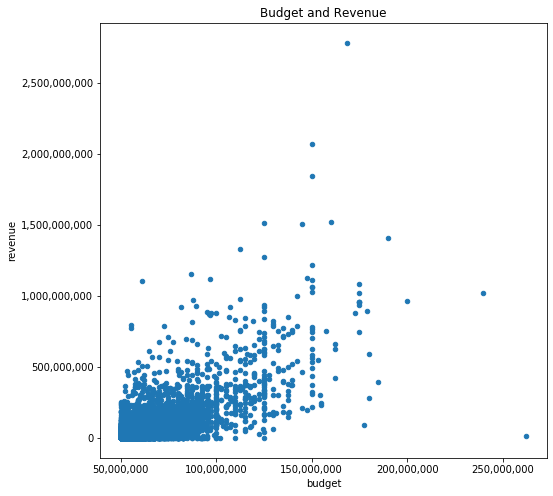

In [94]:
fx = df.plot(x='budget', y='revenue', kind='scatter', title='Budget and Revenue',figsize=(8,8))
fx.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
fx.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);

In [31]:
df = df.loc[:,'budget']
df.head(6)

0    150000000
1    150000000
2    110000000
3    200000000
4    190000000
5    135000000
Name: budget, dtype: int64

# Here's a plot showing the relationship between 'budget' and 'revenue':

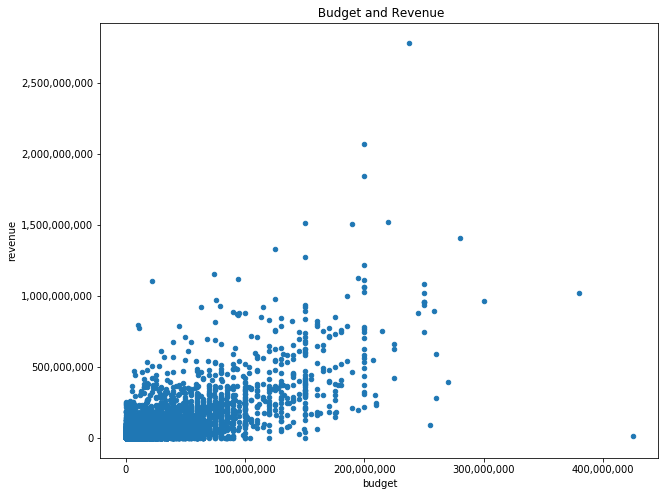

In [86]:
ax = df.plot(x='budget', y='revenue', kind='scatter', title=' Budget and Revenue',figsize=(10,8))
ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);

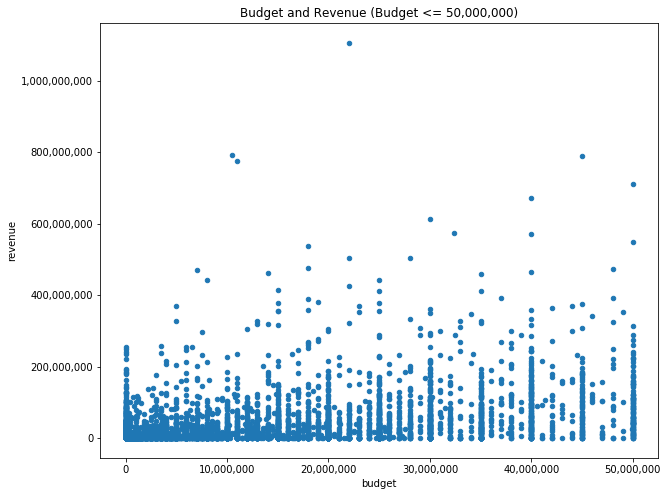

In [90]:
ax = df[df['budget'] <= 50000000].plot(x='budget', y='revenue', kind='scatter', title='Budget and Revenue (Budget <= 50,000,000)', figsize=(10,8))
ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);

# Plot for 'budget' > 50,000,000:

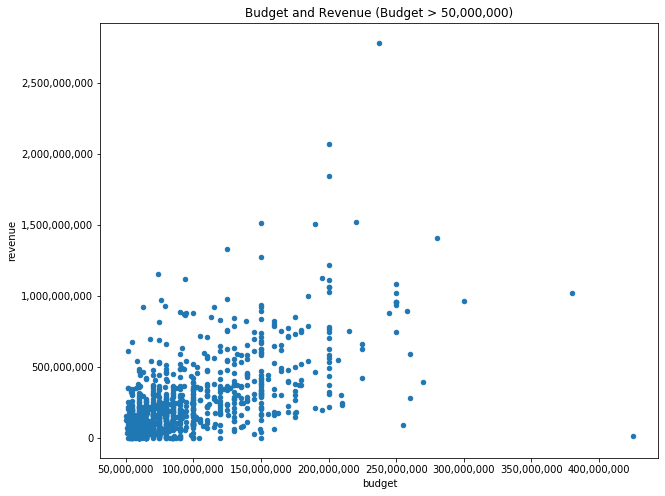

In [93]:
ax = df[df['budget'] > 50000000].plot(x='budget', y='revenue', kind='scatter', title='Budget and Revenue (Budget > 50,000,000)', figsize=(10,8))
ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);

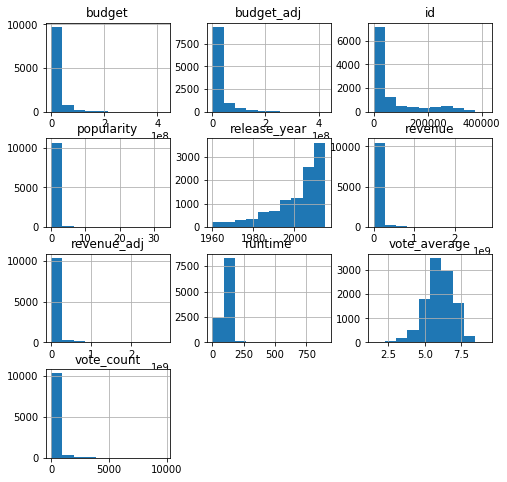

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('tmdb_movies.csv')
low_budget=df.query('budget < 100000000')
df.hist(figsize=(8, 8));

<a id='conclusions'></a>
## Conclusions

  Films with a budget of more than $ 100 million have no connection between budget and revenue.
Some movie genres tend to be more lucrative, while animation and adventure genres are the best-grossing companies.
  There is a correlation between the highest-grossing films and the Adventure & Action genres. Also, the highest-grossing films are associated with high popularity.